Initialise  
Mid price - classification rather than, 
Label - neural network (Random Forest)
mid-price

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import glob

Import data

In [3]:
# path where months data is saved
path = r'C:\Users\Tim\Documents\Bristol Uni\dsmp-2024-group18\ARIMA Model Development\Month Prediction\Month Data\January\*.csv' 
all_files = glob.glob(path)
test_file = pd.read_csv(r'C:\Users\Tim\Documents\Bristol Uni\dsmp-2024-group18\ARIMA Model Development\Month Prediction\Month Data\January\UoB_Set01_2025-02-03LOBs.csv' )

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)
data['Time'] = pd.to_datetime(data['Time'])

#print(frame.head(15))
print(data.head())
print(data.tail(15))



C:\Users\Tim\AppData\Local\Temp\ipykernel_10980\2197785027.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time'] = pd.to_datetime(data['Time'])


                 Time          Bid1        Bid2          Ask1          Ask2  \
0 2024-03-10 07:30:00      [1.0, 6]      [0, 0]        [0, 0]        [0, 0]   
1 2024-03-10 07:30:01    [27.0, 20]   [1.0, 12]    [798.4, 5]        [0, 0]   
2 2024-03-10 07:30:02   [261.75, 8]  [21.0, 13]  [306.46, 13]   [403.57, 7]   
3 2024-03-10 07:30:03  [262.75, 48]  [261.0, 8]  [292.56, 16]  [294.59, 32]   
4 2024-03-10 07:30:04   [264.0, 36]  [261.0, 6]  [287.45, 20]   [288.1, 21]   

   Mid-Price  Total_volume  Bid_ask_spread  Order_imbalance  
0       0.50             6           -1.00             1.00  
1     412.70            37          771.40             0.73  
2     284.11            41           44.71             0.02  
3     277.66           104           29.81             0.08  
4     275.73            83           23.45             0.01  
                      Time          Bid1           Bid2          Ask1  \
703754 2024-03-10 15:59:45   [363.0, 70]    [361.0, 10]  [470.05, 39]   
703755 

In [4]:
order_imbalance_df = pd.DataFrame()
order_imbalance_df['Order_imbalance'] = data['Order_imbalance']

Backfill to remove nan values

C:\Users\Tim\AppData\Local\Temp\ipykernel_10980\4159476887.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  order_imbalance_df['Order_imbalance'].fillna(method='bfill')


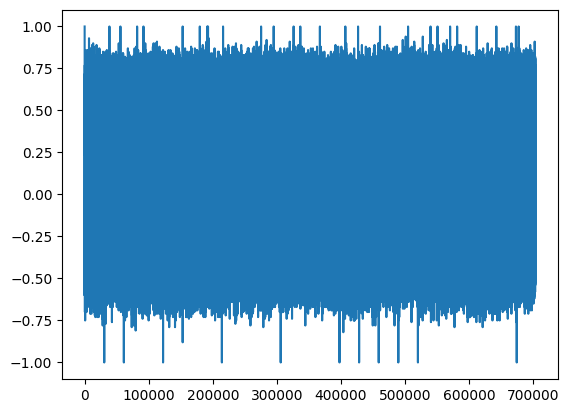

In [5]:
order_imbalance_df['Order_imbalance'].fillna(method='bfill')
plt.plot(order_imbalance_df)
plt.show()

Split the data 80:20 by time

                      Time          Bid1         Bid2          Ask1  \
673165 2024-03-10 15:59:55  [305.78, 27]   [302.0, 9]  [385.73, 11]   
673166 2024-03-10 15:59:56   [307.0, 12]   [302.0, 4]   [381.2, 10]   
673167 2024-03-10 15:59:57   [307.0, 27]  [304.4, 15]   [378.0, 18]   
673168 2024-03-10 15:59:58   [307.0, 37]  [305.0, 26]  [347.43, 42]   
673169 2024-03-10 15:59:59   [307.0, 28]  [305.0, 28]   [342.0, 32]   

                Ask2  Mid-Price  Total_volume  Bid_ask_spread  Order_imbalance  
673165  [388.62, 16]     345.75            63           79.95             0.14  
673166   [382.25, 8]     344.10            34           74.20            -0.06  
673167   [379.0, 36]     342.50            96           71.00            -0.12  
673168  [361.56, 36]     327.21           141           40.43            -0.11  
673169  [342.78, 36]     324.50           124           35.00            -0.10  


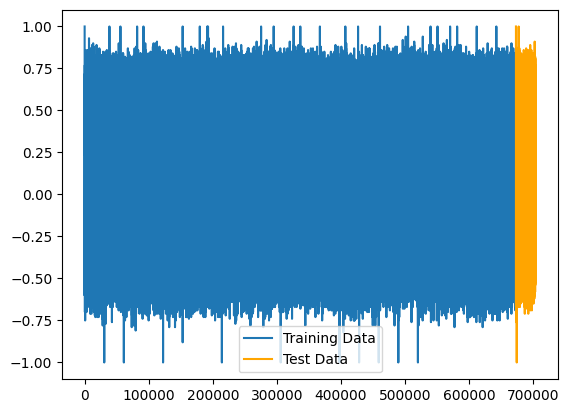

In [6]:
# Get just the mid price
split_index = len(order_imbalance_df) - len(test_file)

# Split the DataFrame into train and test sets based on the split index
train = (order_imbalance_df[0:split_index])
test = (order_imbalance_df[split_index:])

# check that one day is removed
print(data[0:split_index].tail())

plt.plot(train, label = 'Training Data')
plt.plot(test, color = 'orange', label = 'Test Data')
plt.legend()
plt.show()


Do ADF Test to check if data is stationary 

In [7]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(mid_price):
    result=adfuller(mid_price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [8]:
adfuller_test(train['Order_imbalance'])

ADF Test Statistic : -140.7816696159397
p-value : 0.0
#Lags Used : 23
Number of Observations Used : 673146
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Plot ACF

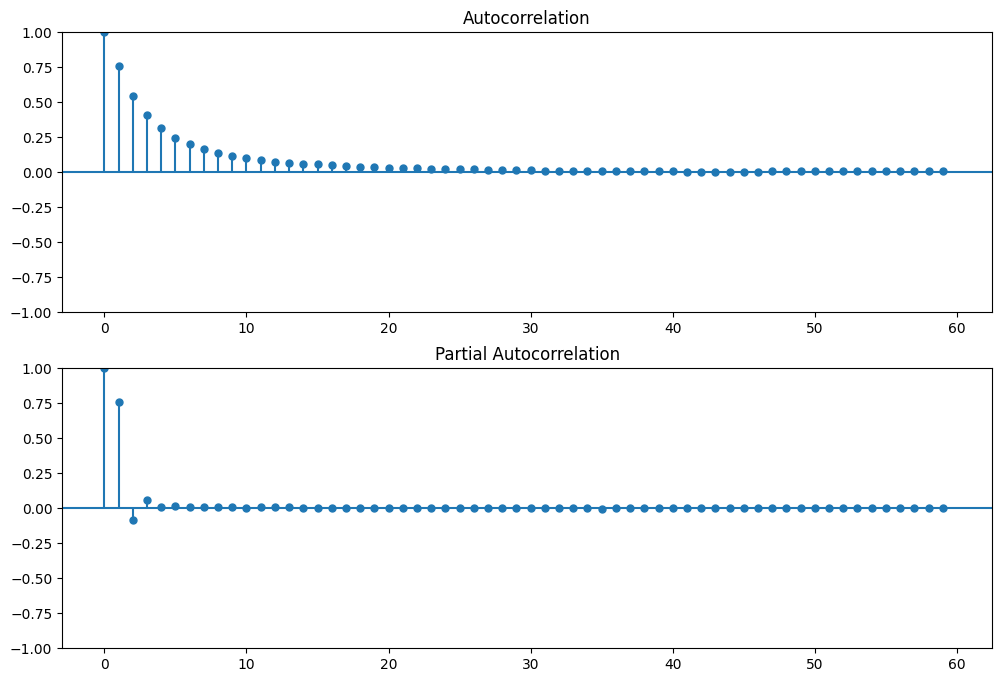

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train, ax=ax[0])  # ACF plot for 'Mid-Price'
plot_pacf(train, ax=ax[1])  # PACF plot for 'Mid-Price'

plt.show()

<Axes: >

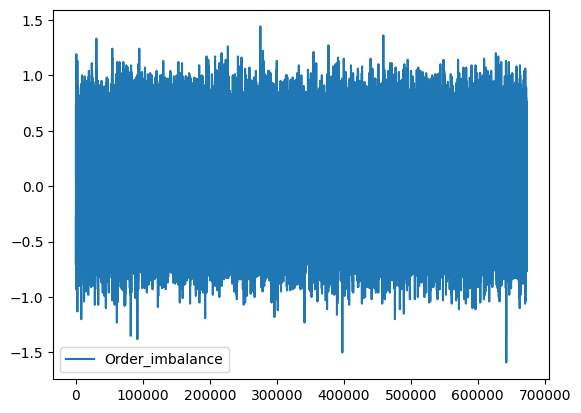

In [10]:
train_diff = train.diff().dropna()
train_diff.plot()

Replot acf and pacf

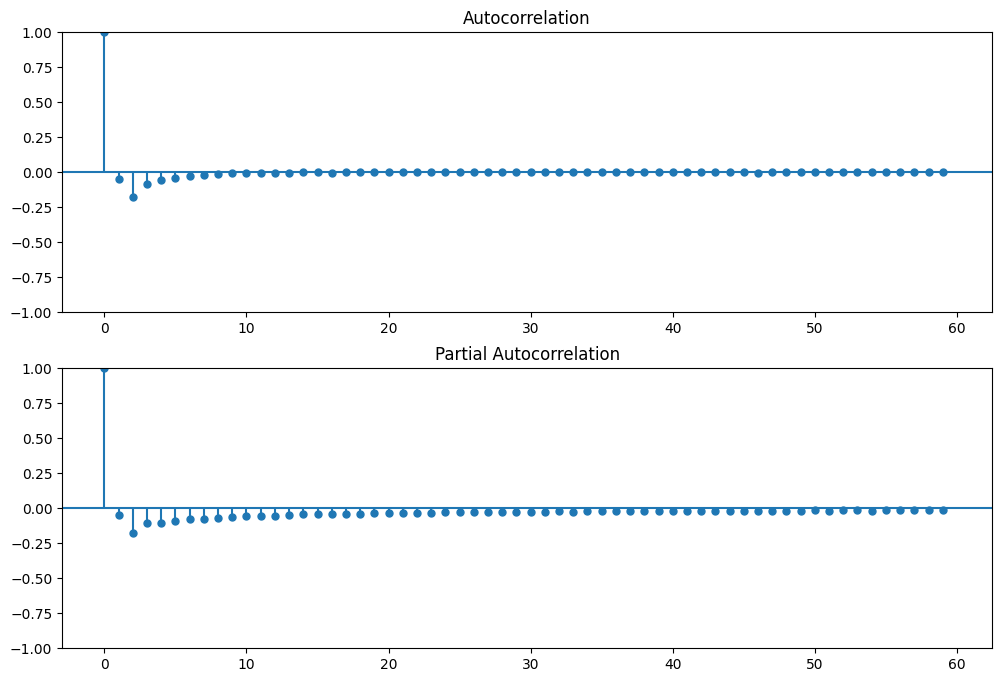

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train_diff, ax=ax[0])  # ACF plot for 'Mid-Price'
plot_pacf(train_diff, ax=ax[1])  # PACF plot for 'Mid-Price'

plt.show()

Use pdarima package to check d calc

In [12]:
from pmdarima.arima.utils import ndiffs 

ndiffs(train, test = "adf")

0

In [20]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

stepwise_fit = auto_arima(train['Mid-Price'], trace = True,
                          supress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=427.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5408143.351, Time=8.95 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5402540.677, Time=35.43 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5399621.737, Time=52.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5408141.352, Time=4.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=159.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5371353.156, Time=51.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=225.34 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5355465.980, Time=120.02 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=369.02 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=5342236.163, Time=171.92 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=536.92 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=5332369.923, Time=237.96 sec


Plot interpretation

ACF Plot Interpretation:

The ACF plot tails off gradually, which indicates that the data may be either an AR process or a mixed ARMA process. In an ACF plot for a pure MA process, we would expect a sharp cut-off after the significant lags. Therefore p = 1.

PACF Plot Interpretation:

The PACF plot shows a significant spike at lag 1, and then it almost immediately cuts off (becomes insignificant). Given the lack of significant spikes in the ACF plot beyond the immediate lag, I will start with q=0 and test q=1 as well.

Differencing Term (d):

As per the ADF test, the data is stationary so d = 0




Do ARIMA Test

In [13]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(train,order=(1,1,0)) #p,d,q
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        Order_imbalance   No. Observations:               673170
Model:                 ARIMA(1, 1, 0)   Log Likelihood               90641.696
Date:                Sun, 10 Mar 2024   AIC                        -181279.393
Time:                        14:27:32   BIC                        -181256.553
Sample:                             0   HQIC                       -181273.006
                             - 673170                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0456      0.001    -41.146      0.000      -0.048      -0.043
sigma2         0.0447   5.65e-05    791.112      0.000       0.045       0.045
===================================================================================
Ljung-Box (L1) (Q):                  43.26   Jarque-Bera (JB):             96045.25
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.99   Skew:                             0.21
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
start = len(train)
end = len(train) + len(test) - 1
pred=model_fit.predict(start=start,end=end,dynamic=True)

pred.index = test.index[:end+1]
pred.head()

673170   -0.100456
673171   -0.100435
673172   -0.100436
673173   -0.100436
673174   -0.100436
Name: predicted_mean, dtype: float64

Plot the predicted against the test

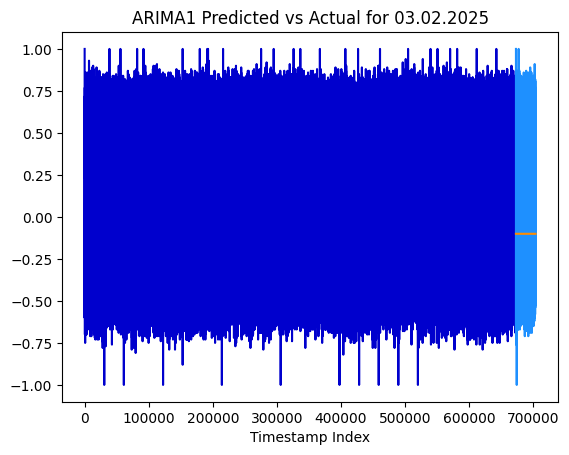

In [16]:
plt.plot(train, color = 'mediumblue')
plt.plot(test, color = 'dodgerblue')
plt.plot(pred, color = 'darkorange')
plt.title('ARIMA1 Predicted vs Actual for 03.02.2025')
plt.xlabel('Timestamp Index')
plt.show()

Plot predicted against real

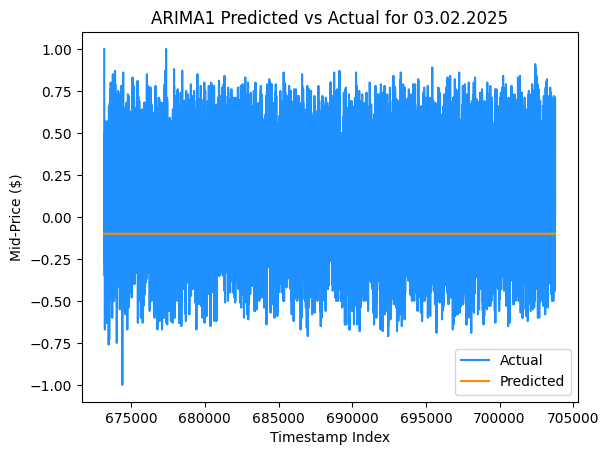

In [17]:
plt.plot(test, color = 'dodgerblue', label = 'Actual')
plt.plot(pred, color = 'darkorange', label = 'Predicted')
plt.title('ARIMA1 Predicted vs Actual for 03.02.2025')
plt.xlabel('Timestamp Index')
plt.ylabel('Mid-Price ($)')
plt.legend()
plt.show()

In [18]:
order_imbalance_pred = pd.DataFrame()
order_imbalance_pred['Actual'] = test
order_imbalance_pred['Predicted'] = pred
order_imbalance_pred.set_index(test_file['Time'], inplace = True)


order_imbalance_pred.to_csv('Predicted Order Imbalance (Month).csv')

Error Measurements

In [24]:
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error
rmse = mean_squared_error(test, pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# R-squared
from sklearn.metrics import r2_score
r2 = r2_score(test, pred)
print("R-squared:", r2)

Mean Absolute Error (MAE): 39.23816585088649
Mean Squared Error (MSE): 3504.0595470807602
Root Mean Squared Error (RMSE): 59.19509732301114
R-squared: -0.009736244823933093


C:\Users\Tim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 10.306754469224506

The MAE tells you that, on average, your model's predictions are about 10.31 units away from the actual values. This is a direct measure of how accurate your model is, without considering the direction of the errors.


Mean Squared Error (MSE): 401.32652005997784

The MSE significantly higher than the MAE suggests that there are instances where the model's predictions are quite far from the actual values. This metric is sensitive to outliers, indicating your predictions might have some substantial errors in certain cases.


Root Mean Squared Error (RMSE): 20.03313555237866

The RMSE, like the MSE, is affected by outliers and large errors, and provides a sense of the average magnitude of the errors in the same units as your target variable. An RMSE of 20.03 means that the standard deviation of the prediction errors is around 20.03 units. 
This gives you an idea of the spread of the errors around the mean error (MAE).

R-squared: -0.19216190799522415

An R-squared value below 0 suggests that the model performs worse than a simple horizontal line representing the mean of the dependent variable. This negative value indicates that your model may not have captured any of the underlying trends in the data and is not explaining the variance in your target variable effectively.


Overall Interpretation:
The MAE and RMSE values indicate that the model has room for improvement in terms of accuracy. The large gap between MAE and RMSE suggests the presence of significant outliers or predictions far from the actual values.

The negative R-squared value is particularly concerning as it indicates the model's predictions do not align well with the actual data. It suggests that the model, in its current form, might not be suitable for your data or that the features you're using are not good predictors of the target variable.


Recommendations:
Review Model Features: Consider whether additional features or different representations of your current features could improve model performance.
Outlier Analysis: Examine your data for outliers that could be disproportionately influencing the model's errors.
Model Complexity: If your model is too simple, it might not capture complex patterns in the data. Conversely, if it's too complex, it might be overfitting. Adjusting model complexity could be a way to improve performance.
Cross-Validation: Use cross-validation to ensure that your model's performance is consistent across different subsets of your data.
Alternative Models: Explore different modeling techniques that might be more suited to your data's characteristics.